<a href="https://colab.research.google.com/github/saurabhbarge/CE888-7-SP/blob/main/Lab_3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, f1_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

10

**Using Label Encoder to convert string to categorical data**

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df[["job"]] = df[["job"]].apply(LabelEncoder().fit_transform)
df[["marital"]] = df[["marital"]].apply(LabelEncoder().fit_transform)
df[["education"]] = df[["education"]].apply(LabelEncoder().fit_transform)
df[["default"]] = df[["default"]].apply(LabelEncoder().fit_transform)
df[["housing"]] = df[["housing"]].apply(LabelEncoder().fit_transform)
df[["loan"]] = df[["loan"]].apply(LabelEncoder().fit_transform)
df[["contact"]] = df[["contact"]].apply(LabelEncoder().fit_transform)
df[["month"]] = df[["month"]].apply(LabelEncoder().fit_transform)
df[["day_of_week"]] = df[["day_of_week"]].apply(LabelEncoder().fit_transform)
df[["poutcome"]] = df[["poutcome"]].apply(LabelEncoder().fit_transform)
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

In [8]:
cat_features = ['job','marital','education','default','housing','loan','contact','month',
                'day_of_week','poutcome']

In [9]:
df = pd.get_dummies(df, columns=cat_features)

In [10]:
df.shape

(41188, 64)

In [11]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,default_0,default_1,default_2,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2,contact_0,contact_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [12]:
df = df.dropna()
df.shape

(41188, 64)

In [13]:
df.isna().sum()

age              0
duration         0
campaign         0
pdays            0
previous         0
                ..
day_of_week_3    0
day_of_week_4    0
poutcome_0       0
poutcome_1       0
poutcome_2       0
Length: 64, dtype: int64

In [14]:
df.drop('duration',axis=1,inplace=True)

In [15]:
df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_0', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7',
       'job_8', 'job_9', 'job_10', 'job_11', 'marital_0', 'marital_1',
       'marital_2', 'marital_3', 'education_0', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5', 'education_6',
       'education_7', 'default_0', 'default_1', 'default_2', 'housing_0',
       'housing_1', 'housing_2', 'loan_0', 'loan_1', 'loan_2', 'contact_0',
       'contact_1', 'month_0', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'poutcome_0', 'poutcome_1', 'poutcome_2'],
      dtype='object')

In [16]:
df.shape

(41188, 63)

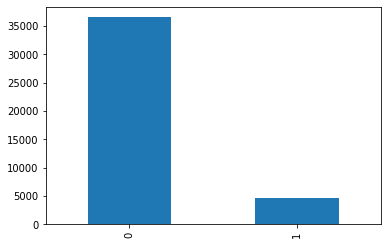

In [17]:
df['y'].value_counts().plot(kind='bar')

In [18]:
df.shape

(41188, 63)

**Percentage of Target Variables**

In [19]:
(sum(df['y'] == 1)/len(df))*100

11.265417111780131

In [20]:
X = df.drop('y',axis=1)

In [21]:
y = df['y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50,stratify=y)
# train, test = train_test_split(X, test_size=0.20,random_state=50,stratify=df['y'])

**Dummy Classifier**

In [23]:
dummy_clf = DummyClassifier(strategy='stratified') # generates predictions by respecting the training set's class distribution
# scores = cross_val_score(clf, X, y, cv=10,scoring=make_scorer(f1_score))
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
# print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))

Dummy ACC: 0.10 +/- 0.01


In [24]:
from sklearn.metrics import f1_score

**Random forest with Cross validation**

In [32]:
rf = RandomForestClassifier(n_estimators=150,max_depth=6)
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("RF ACC: %0.2f +/- %0.2f" % (rf_scores.mean(), rf_scores.std()))

RF ACC: 0.28 +/- 0.05


In [34]:
rf1 = RandomForestClassifier(n_estimators=200,max_depth=10)
rf1_scores = cross_val_score(rf1, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("RF ACC: %0.2f +/- %0.2f" % (rf1_scores.mean(), rf1_scores.std()))

RF ACC: 0.33 +/- 0.05


In [43]:
rf2 = RandomForestClassifier(n_estimators=400,max_depth=8,random_state=60)
rf2.fit(X_train,y_train)
rf2preds = rf2.predict(X_test)
print(f1_score(y_test,rf2preds))

0.33495934959349594


**Feature Importance using Random Forest**

In [44]:
feature_importances = pd.DataFrame(rf2.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [45]:
feature_importances.head()

,importance
nr.employed,0.154584
euribor3m,0.145614
pdays,0.109492
poutcome_2,0.085388
emp.var.rate,0.080865
